In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fftshift, fft2, ifftshift, ifft2
from PIL import Image, ImageDraw, ImageFont
import cv2

In [ ]:
def show_img(imagen_np, title="", vmin=0, vmax=255):
    plt.imshow(imagen_np, cmap='gray', vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Ejercicio 1

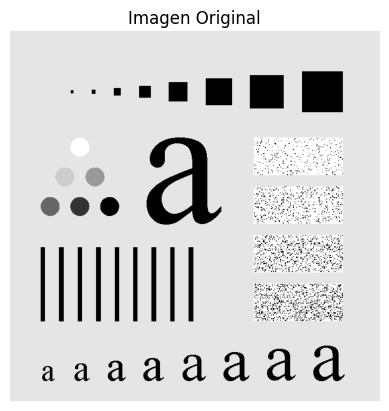

In [ ]:
charImg = np.array(Image.open('charImg.tif'))
show_img(charImg, title= "Imagen Original")

In [ ]:
test_sizes = [3,5,9,15,25,35,45,55]
N = len(test_sizes)

# Banco de imagenes Blurreadas
img_array = np.empty((N, *charImg.shape), dtype=charImg.dtype)

# Blurreamos las imagenes para los distintos tamaños de Kernel
for i in range(N):
  size= test_sizes[i]
  img_array[i] = cv2.blur(charImg, (size,size))

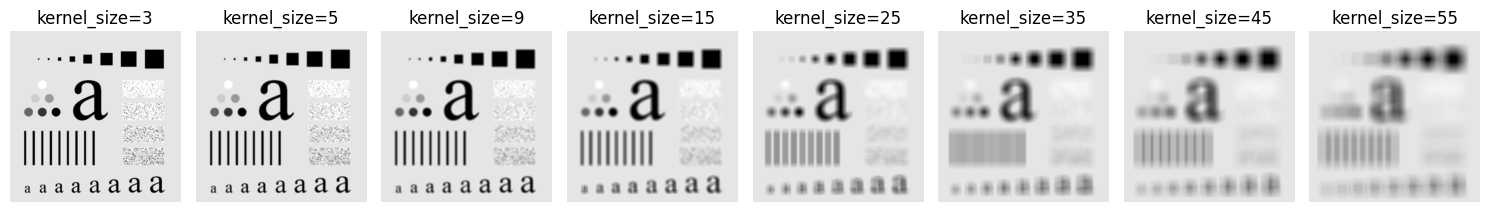

In [ ]:
fig, axs = plt.subplots(1, N, figsize=(15, 4))

for i in range(N):
    axs[i].imshow(img_array[i], cmap='gray', vmin=0, vmax=255)
    axs[i].set_title("kernel_size=" + str(test_sizes[i]))
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# Ejercicio 2

In [ ]:
starsImg = np.array(Image.open('stars.png'))
starsLP = cv2.blur(starsImg, (15,15))
starsTHold = (starsLP > 255*0.25) * 255

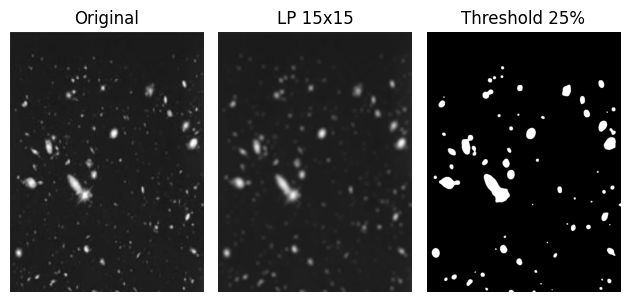

In [ ]:
fig, axs = plt.subplots(1, 3)

axs[0].imshow(starsImg, cmap='gray', vmin=0, vmax=255)
axs[0].set_title("Original")
axs[0].axis('off')

axs[1].imshow(starsLP, cmap='gray', vmin=0, vmax=255)
axs[1].set_title("LP 15x15")
axs[1].axis('off')

axs[2].imshow(starsTHold, cmap='gray', vmin=0, vmax=255)
axs[2].set_title("Threshold 25%")
axs[2].axis('off')

plt.tight_layout()
plt.show()

# Ejercicio 3

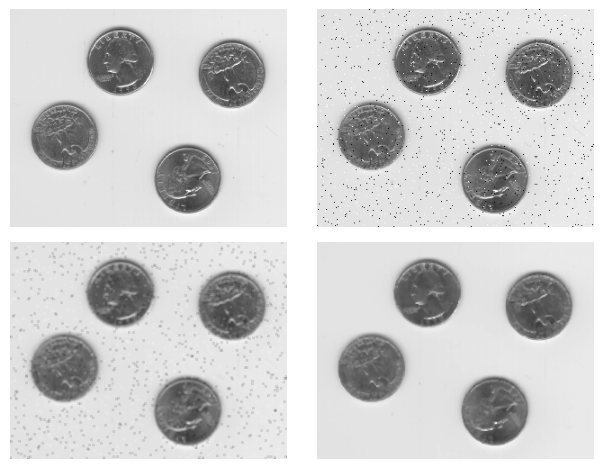

In [ ]:
'''
from: https://la.mathworks.com/help/images/ref/imnoise.html
Para añadir ruido 'salt & pepper' con densidad d a una imagen, imnoise primero asigna a cada píxel un valor de probabilidad aleatorio a partir de una distribución uniforme estándar en el intervalo abierto (0, 1).
En píxeles con un valor de probabilidad en el intervalo (0, d/2), el valor del píxel se establece como 0. El número de píxeles que se establece como 0 es, aproximadamente, d*numel(I)/2.
En píxeles con un valor de probabilidad en el intervalo [d/2, d), el valor del píxel se establece como el valor máximo del tipo de datos de la imagen. El número de píxeles que se establece como el valor máximo es, aproximadamente, d*numel(I)/2.
En píxeles con un valor de probabilidad en el intervalo [d, 1), el valor del píxel no cambia.
'''
def addSPNoise (image, d=0.05):
	noise = np.random.rand(*image.shape)
	image[(noise > 0) & (noise < d/2)] = 0
	image[(noise >= d/2) & (noise < d)] = 255

# Lectura de imagen en escala de grises
image = cv2.imread('eight.tif', cv2.IMREAD_GRAYSCALE)

# Imagen original
plt.subplot(2,2,1)
plt.axis('off')
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Agregado de ruido
plt.subplot(2,2,2)
plt.axis('off')
addSPNoise(image, 0.02)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

# Filtro promediador
plt.subplot(2,2,3)
average = cv2.blur(image, (3,3))
plt.axis('off')
plt.imshow(average, cmap='gray', vmin=0, vmax=255)

# Filtro mediana
plt.subplot(2,2,4)
median = cv2.medianBlur(image, 3)
plt.axis('off')
plt.imshow(median, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()
plt.show()

#Ejercico 4

##a) Original-->Lapaciano-->Cambio de escala + Fondo

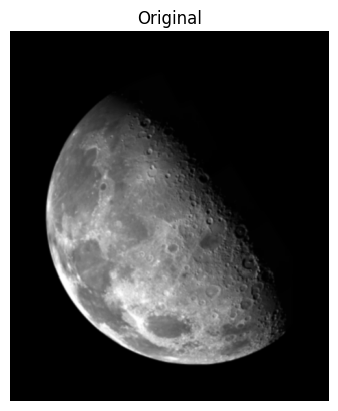

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def plot_moon(img, title):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()

moon_img = cv2.imread('blurry_moon.tif', cv2.IMREAD_GRAYSCALE)
plot_moon(moon_img,'Original')

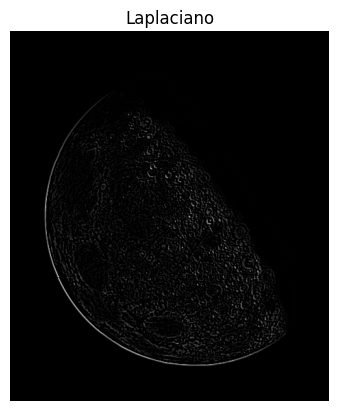

In [ ]:
laplacian_kernel = np.array([[1, 1, 1],
                             [1,-8, 1],
                             [1, 1, 1]])
laplacian = cv2.filter2D(moon_img, -1, laplacian_kernel)
plot_moon(laplacian,'Laplaciano')

Tener en cuenta que $g(x,y) = f(x,y)-\nabla^2f(x,y)$, ya que  el valor central del kernel laplaciano utilizado es negativo

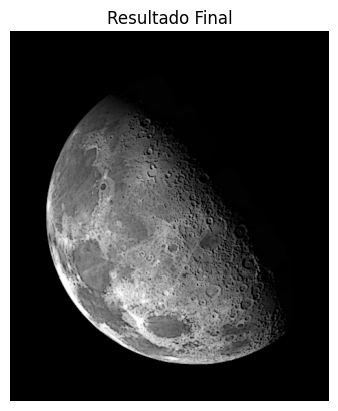

In [ ]:
laplacian_norm = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX)   #Normalización
moon = enhanced_image = cv2.subtract(moon_img, laplacian_norm)
plot_moon(moon,'Resultado Final')

##b) Simplificación ( Lapaciano + Fondo)

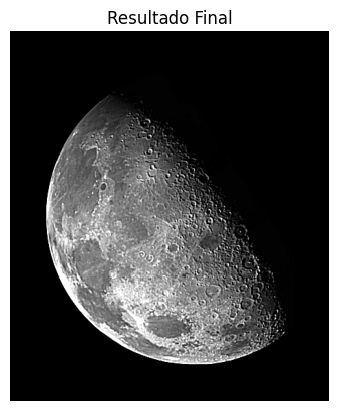

In [ ]:
hpf_kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])
moon2 = cv2.filter2D(moon_img, -1, hpf_kernel)
plot_moon(moon2,'Resultado Final')

#Ejercicio 5

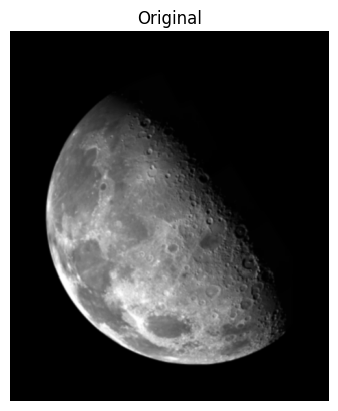

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def plot_moon(img, title):
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()

moon_img = cv2.imread('blurry_moon.tif', cv2.IMREAD_GRAYSCALE)
plot_moon(moon_img,'Original')

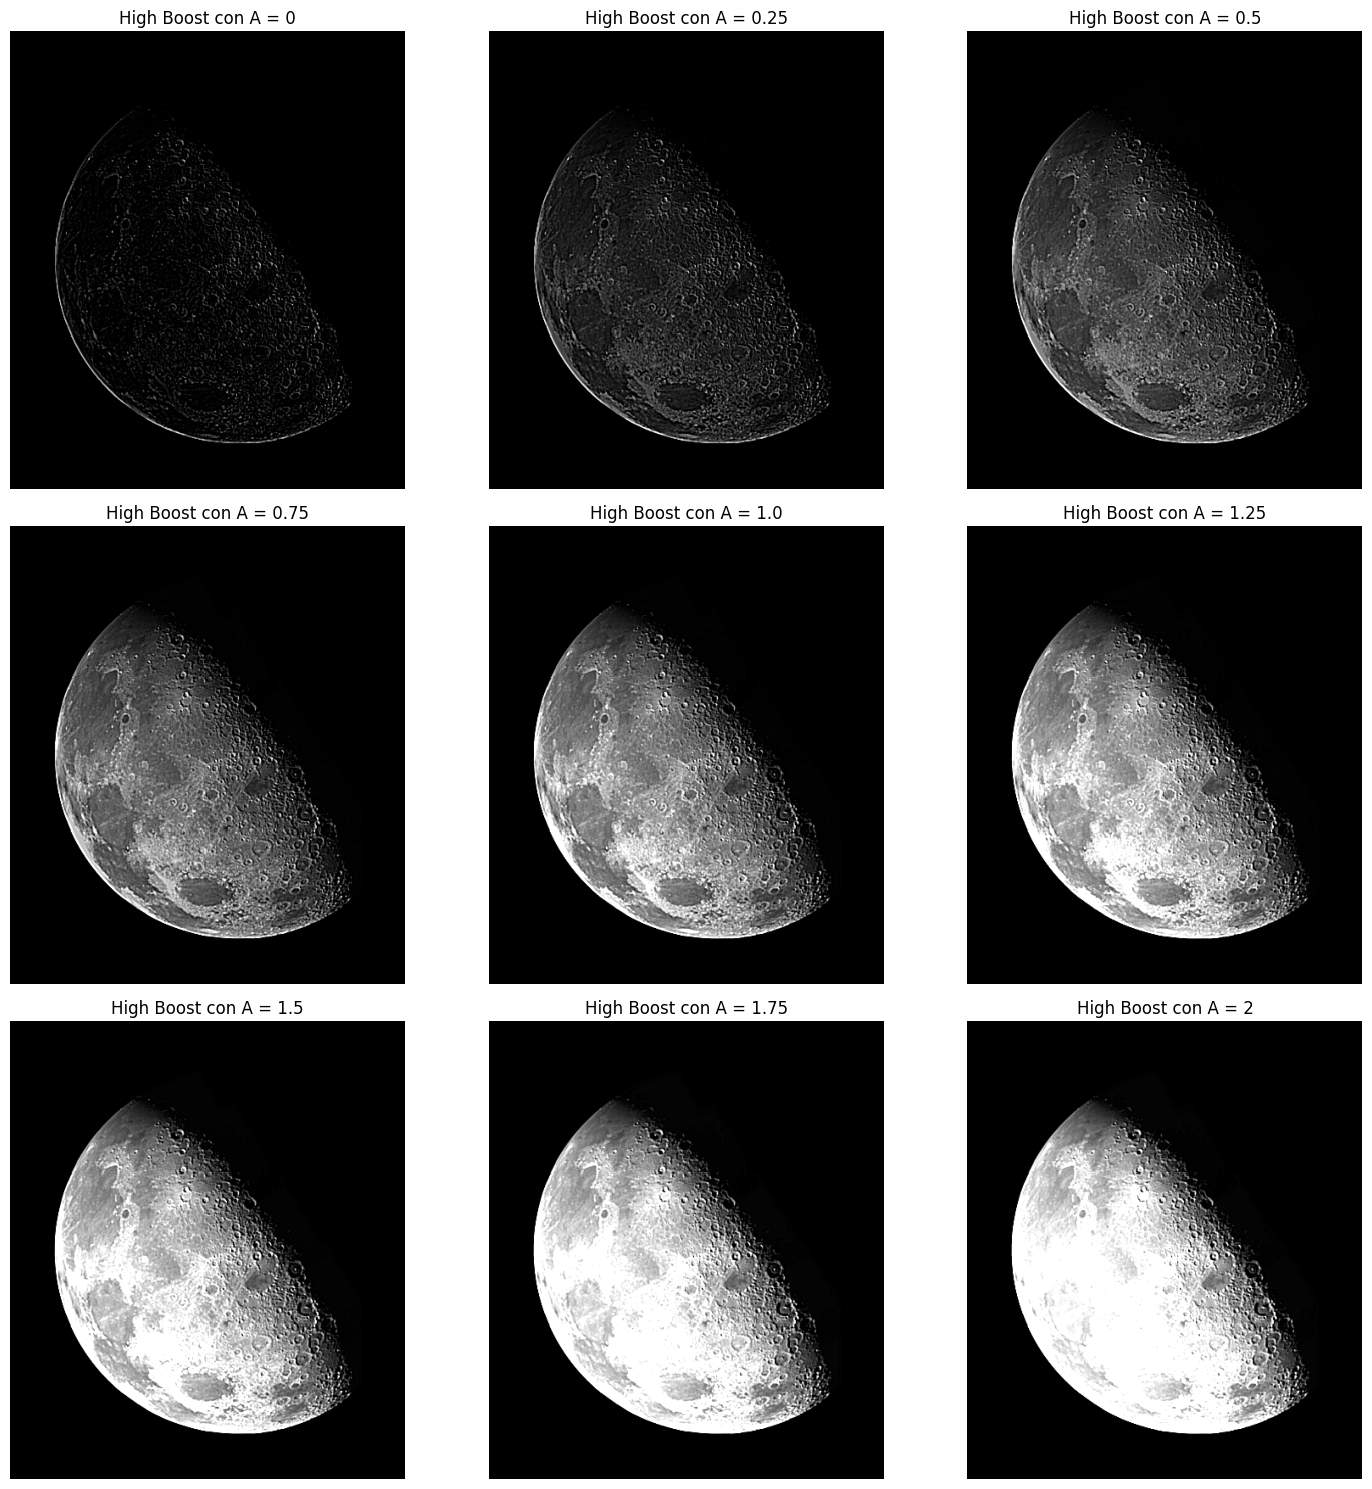

In [ ]:
valores_A = [0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2]

plt.figure(figsize=(15, 15))

for i, A in enumerate(valores_A):
    kernel = np.array([[-1, -1, -1],
                        [-1, A + 8, -1],
                        [-1, -1, -1]])

    high_boost = cv2.filter2D(moon_img, -1, kernel)
    high_boost = cv2.normalize(high_boost, None, 0, 255, cv2.NORM_MINMAX) #Normalizo

    plt.subplot(3, 3, i + 1)
    plt.imshow(high_boost, cmap='gray', vmin=0, vmax=255)
    plt.title(f'High Boost con A = {A}')
    plt.axis('off')

plt.tight_layout()
plt.show()

Se puede observar que el mejor resultados se obtiene con $0.75<A<1.25$.

# Ejercicio 6

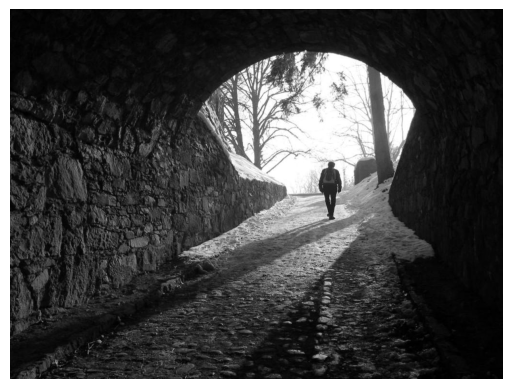

In [ ]:
tunImg = np.array(Image.open('tun.jpg'))
show_img(tunImg)

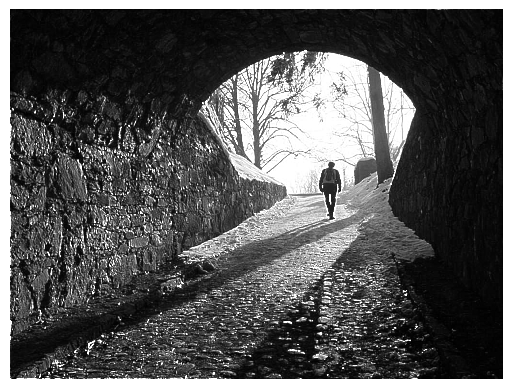

In [ ]:
# Transformada de Fourier al logaritmo de la funcion original
tun_fft = np.fft.fft2(np.log(tunImg + 1.0))
tun_fft = np.fft.fftshift(tun_fft)  # Center FFT

# Parametros Filtro homomórfico
gamma_l = 0.999
gamma_h = 4
c = 1
D0 = 0.4

# Creamos D
x, y = np.meshgrid(np.linspace(-1, 1, tunImg.shape[1]), np.linspace(-1, 1, tunImg.shape[0]))
D = np.sqrt((x * x) + (y * y))

# Calculamos la transferencia del filtro
filtro_homomorfico = (gamma_h - gamma_l) * (1 - np.exp(-c * (D/ D0)**2)) + gamma_l

# Aplicamos filtro y volvemos al espacio
fft_filtrado= tun_fft * filtro_homomorfico
img_filtrado = np.fft.ifft2(np.fft.ifftshift(fft_filtrado)).real
imagen_filtrada = np.real(np.exp(img_filtrado))

show_img(imagen_filtrada)

#Ejercicio 7

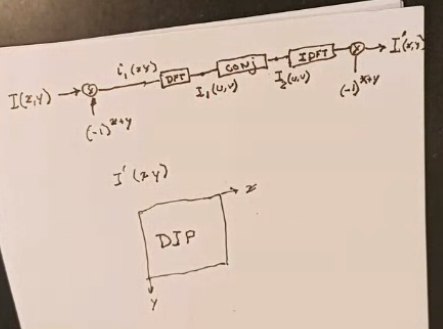

##Explicación

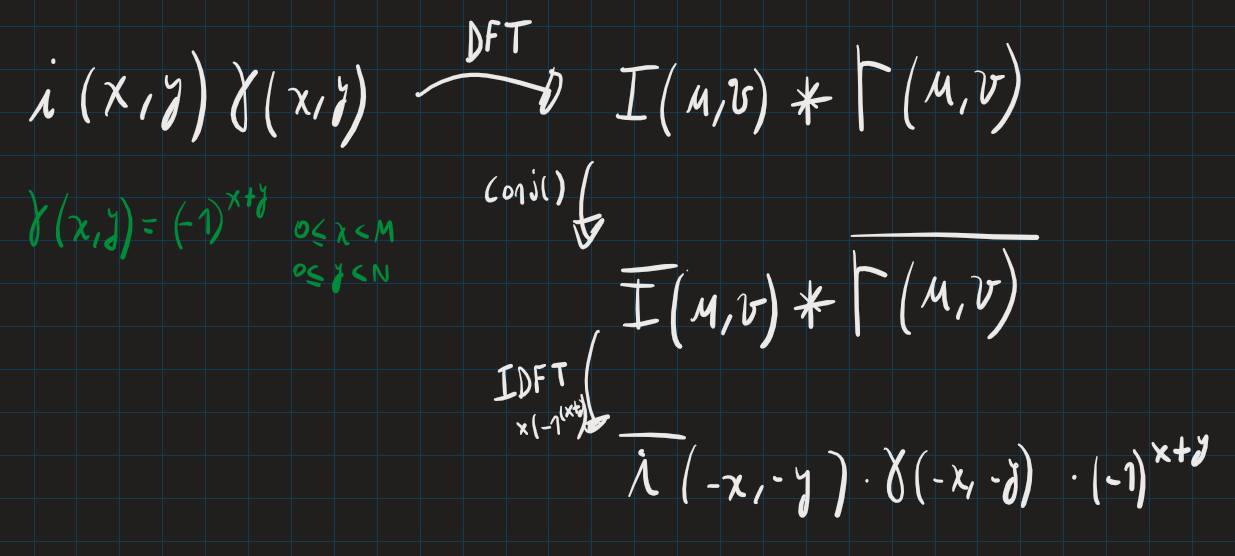

Se puede notar que la relación entre la i(x,y) y la i'(x,y) es en primer lugar, un espejado en ambos ejes. El conjugado no tiene efecto porque la imagen es real, y luego está el efecto de la función que llamamos gamma, esta es la extensión periódica de la función $(-1)^{x+y}$. Si ambas dimensiones de la imagen son pares, entonces la función gamma espejada coincide con $(-1)^{-(x+y)}$ y se cancela con el factor con el que se multiplica. Cuando alguna de las dimensiones no es par, entonces estas funciones no se cancelan y se generan valores negativos en la imagen.

## Script

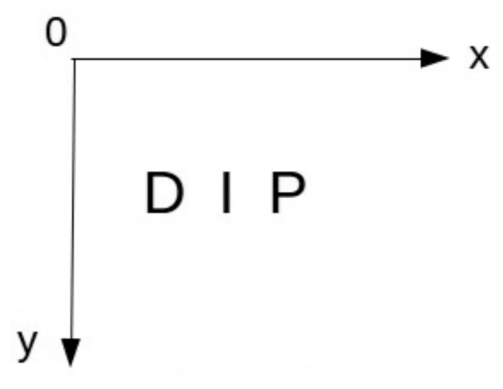

In [ ]:
imagen = cv2.imread('DIP.png', cv2.IMREAD_GRAYSCALE)
show_img(imagen)

In [ ]:
def mirror(image):
  lenX, lenY = np.shape(image)
  inv_matrix=np.asarray([[(-1)**(i+j) for j in range(lenY)] for i in range(lenX)])
  I1 = fft2(image*inv_matrix)
  I2 = np.conj(I1)
  I_prima = ifft2(I2)*inv_matrix
  return I_prima.real

(550, 720)


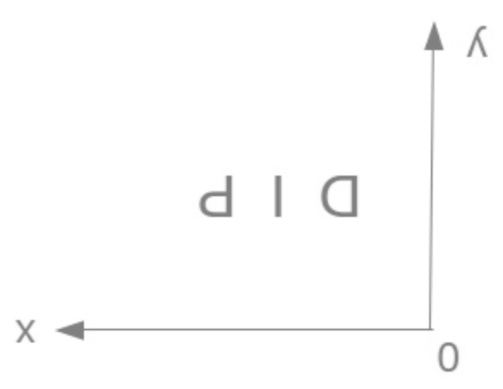

In [ ]:
# Filas y columnas pares
print(imagen.shape)
show_img(mirror(imagen), vmin=-255 , vmax=255)

(550, 719)


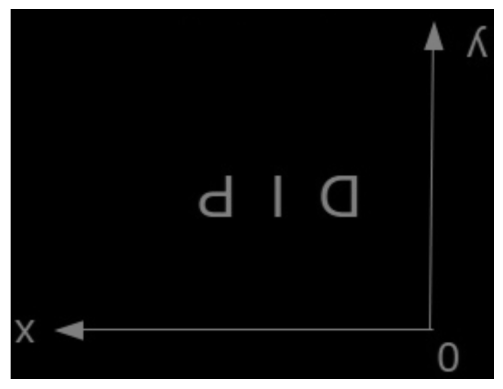

In [ ]:
# Columnas impares
imagen2 = imagen[...,:-1]
print(imagen2.shape)
show_img(mirror(imagen2), vmin=-255 , vmax=255)

(549, 720)


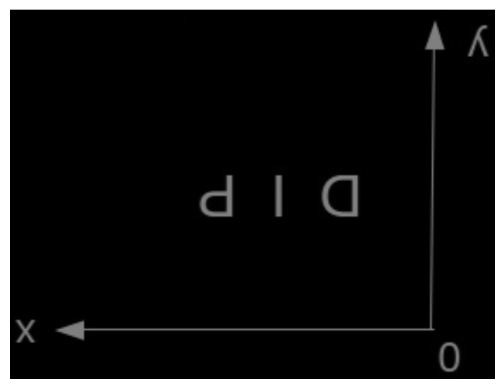

In [ ]:
# Filas impares
imagen3 = imagen[:-1,...]
print(imagen3.shape)
show_img(mirror(imagen3), vmin=-255 , vmax=255)

(549, 719)


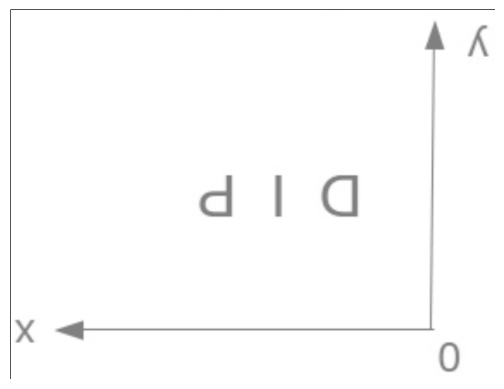

In [ ]:
# Filas y columnas impares
imagen4 = imagen[:-1,:-1]
print(imagen4.shape)
show_img(mirror(imagen4), vmin=-255 , vmax=255)

Se pudo comprobar el efecto del espejado, asi como la inversión de valores cuando las dimensiones no son pares.